In [ ]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import layers, models

In [ ]:
# Création des générateurs d’images
datagen = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2  # 20% des images pour la validation
)

# Chargement des images d’entraînement
train_gen = datagen.flow_from_directory(
   "C:/Users/jireh/Documents/Machine_learning_project/dataset",
    target_size=(150, 150),
    batch_size=32,
    class_mode='binary',
    subset='training'
)

# Chargement des images de validation
val_gen = datagen.flow_from_directory(
     "C:/Users/jireh/Documents/Machine_learning_project/dataset",
    target_size=(150, 150),
    batch_size=32,
    class_mode='binary',
    subset='validation'
)

Found 276 images belonging to 2 classes.
Found 67 images belonging to 2 classes.


In [ ]:
model = tf.keras.Sequential([
    tf.keras.Input(shape=(150, 150, 3)),  # <- ici
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2, 2),

    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2, 2),

    tf.keras.layers.Conv2D(128, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2, 2),

    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])


In [ ]:
model.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['accuracy']
)

# Entraînement du modèle
history = model.fit(
    train_gen,
    epochs=10,
    validation_data=val_gen
)


c:\Users\jireh\miniconda3\envs\Data-ML\lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/10
9/9 ━━━━━━━━━━━━━━━━━━━━ 5s 405ms/step - accuracy: 0.4468 - loss: 1.3564 - val_accuracy: 0.5821 - val_loss: 0.6847
Epoch 2/10
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 154ms/step - accuracy: 0.5787 - loss: 0.6843 - val_accuracy: 0.6119 - val_loss: 0.6900
Epoch 3/10
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 150ms/step - accuracy: 0.7336 - loss: 0.6681 - val_accuracy: 0.6418 - val_loss: 0.6719
Epoch 4/10
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 155ms/step - accuracy: 0.7038 - loss: 0.6080 - val_accuracy: 0.5672 - val_loss: 0.6781
Epoch 5/10
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 154ms/step - accuracy: 0.7845 - loss: 0.4893 - val_accuracy: 0.6119 - val_loss: 0.9215
Epoch 6/10
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 158ms/step - accuracy: 0.7624 - loss: 0.4642 - val_accuracy: 0.5970 - val_loss: 0.6686
Epoch 7/10
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 159ms/step - accuracy: 0.8393 - loss: 0.3936 - val_accuracy: 0.6119 - val_loss: 0.7793
Epoch 8/10
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 158ms/step - accuracy: 0.8785 - loss: 0.2815 - val_accuracy: 0.6567 - val_loss:

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2,
    rotation_range=30,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.15,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)


In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, Input

model = Sequential([
    Input(shape=(150, 150, 3)),

    Conv2D(32, (3,3), activation='relu'),
    MaxPooling2D(2,2),

    Conv2D(64, (3,3), activation='relu'),
    MaxPooling2D(2,2),

    Conv2D(128, (3,3), activation='relu'),
    MaxPooling2D(2,2),

    Flatten(),
    Dropout(0.5),  # Réduction du sur-apprentissage
    Dense(128, activation='relu'),
    Dense(1, activation='sigmoid')  # Binaire
])

model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])


In [ ]:
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

early_stop = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
checkpoint = ModelCheckpoint('best_model.h5', save_best_only=True)

history = model.fit(
    train_gen,
    validation_data=val_gen,
    epochs=30,
    callbacks=[early_stop, checkpoint]
)


Epoch 1/30
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 144ms/step - accuracy: 0.5461 - loss: 0.9027

9/9 ━━━━━━━━━━━━━━━━━━━━ 3s 213ms/step - accuracy: 0.5484 - loss: 0.8962 - val_accuracy: 0.4776 - val_loss: 0.6929
Epoch 2/30
9/9 ━━━━━━━━━━━━━━━━━━━━ 2s 183ms/step - accuracy: 0.5598 - loss: 0.6756 - val_accuracy: 0.4328 - val_loss: 0.7092
Epoch 3/30
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 147ms/step - accuracy: 0.6320 - loss: 0.6568

9/9 ━━━━━━━━━━━━━━━━━━━━ 2s 192ms/step - accuracy: 0.6351 - loss: 0.6555 - val_accuracy: 0.6119 - val_loss: 0.6720
Epoch 4/30
9/9 ━━━━━━━━━━━━━━━━━━━━ 2s 175ms/step - accuracy: 0.6221 - loss: 0.6106 - val_accuracy: 0.6119 - val_loss: 0.7505
Epoch 5/30
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 144ms/step - accuracy: 0.6823 - loss: 0.5796

9/9 ━━━━━━━━━━━━━━━━━━━━ 2s 189ms/step - accuracy: 0.6847 - loss: 0.5785 - val_accuracy: 0.6269 - val_loss: 0.6311
Epoch 6/30
9/9 ━━━━━━━━━━━━━━━━━━━━ 2s 168ms/step - accuracy: 0.7907 - loss: 0.5118 - val_accuracy: 0.6119 - val_loss: 0.6561
Epoch 7/30
9/9 ━━━━━━━━━━━━━━━━━━━━ 2s 168ms/step - accuracy: 0.8650 - loss: 0.3821 - val_accuracy: 0.5373 - val_loss: 0.7811
Epoch 8/30
9/9 ━━━━━━━━━━━━━━━━━━━━ 2s 168ms/step - accuracy: 0.8548 - loss: 0.3037 - val_accuracy: 0.5522 - val_loss: 0.7918
Epoch 9/30
9/9 ━━━━━━━━━━━━━━━━━━━━ 2s 170ms/step - accuracy: 0.8512 - loss: 0.3218 - val_accuracy: 0.5522 - val_loss: 0.7963
Epoch 10/30
9/9 ━━━━━━━━━━━━━━━━━━━━ 2s 168ms/step - accuracy: 0.9443 - loss: 0.1978 - val_accuracy: 0.5821 - val_loss: 0.9906


In [ ]:
datagen = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2,
    rotation_range=40,
    width_shift_range=0.3,
    height_shift_range=0.3,
    shear_range=0.2,
    zoom_range=0.3,
    horizontal_flip=True,
    fill_mode='nearest'
)


In [ ]:
from tensorflow.keras.layers import BatchNormalization, Dropout

model = Sequential([
    Input(shape=(150, 150, 3)),

    Conv2D(32, (3,3), activation='relu'),
    BatchNormalization(),
    MaxPooling2D(2,2),
    Dropout(0.25),

    Conv2D(64, (3,3), activation='relu'),
    BatchNormalization(),
    MaxPooling2D(2,2),
    Dropout(0.25),

    Conv2D(128, (3,3), activation='relu'),
    BatchNormalization(),
    MaxPooling2D(2,2),
    Dropout(0.4),

    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(1, activation='sigmoid')
])


In [ ]:
from tensorflow.keras.optimizers import Adam

optimizer = Adam(learning_rate=1e-4)
model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])
early_stop = EarlyStopping(monitor='val_loss', patience=7, restore_best_weights=True)


In [ ]:
history = model.fit(
    train_gen,                # générateur d’images d’entraînement
    validation_data=val_gen,  # générateur d’images de validation
    epochs=30,                # nombre maximal d’époques (tu peux augmenter si besoin)
    callbacks=[early_stop],   # callback pour early stopping
    verbose=1                 # afficher la progression dans la console
)


Epoch 1/30
9/9 ━━━━━━━━━━━━━━━━━━━━ 6s 477ms/step - accuracy: 0.5310 - loss: 1.6447 - val_accuracy: 0.5821 - val_loss: 0.6763
Epoch 2/30
9/9 ━━━━━━━━━━━━━━━━━━━━ 4s 415ms/step - accuracy: 0.7007 - loss: 0.7896 - val_accuracy: 0.5821 - val_loss: 0.7051
Epoch 3/30
9/9 ━━━━━━━━━━━━━━━━━━━━ 4s 401ms/step - accuracy: 0.6580 - loss: 0.7204 - val_accuracy: 0.5821 - val_loss: 0.9259
Epoch 4/30
9/9 ━━━━━━━━━━━━━━━━━━━━ 4s 400ms/step - accuracy: 0.7903 - loss: 0.4524 - val_accuracy: 0.5821 - val_loss: 1.3316
Epoch 5/30
9/9 ━━━━━━━━━━━━━━━━━━━━ 4s 403ms/step - accuracy: 0.8297 - loss: 0.4215 - val_accuracy: 0.5821 - val_loss: 1.5597
Epoch 6/30
9/9 ━━━━━━━━━━━━━━━━━━━━ 4s 420ms/step - accuracy: 0.8219 - loss: 0.3624 - val_accuracy: 0.5821 - val_loss: 2.0458
Epoch 7/30
9/9 ━━━━━━━━━━━━━━━━━━━━ 4s 412ms/step - accuracy: 0.8705 - loss: 0.3074 - val_accuracy: 0.5821 - val_loss: 2.1721
Epoch 8/30
9/9 ━━━━━━━━━━━━━━━━━━━━ 3s 379ms/step - accuracy: 0.8476 - loss: 0.2916 - val_accuracy: 0.5821 - val_loss:

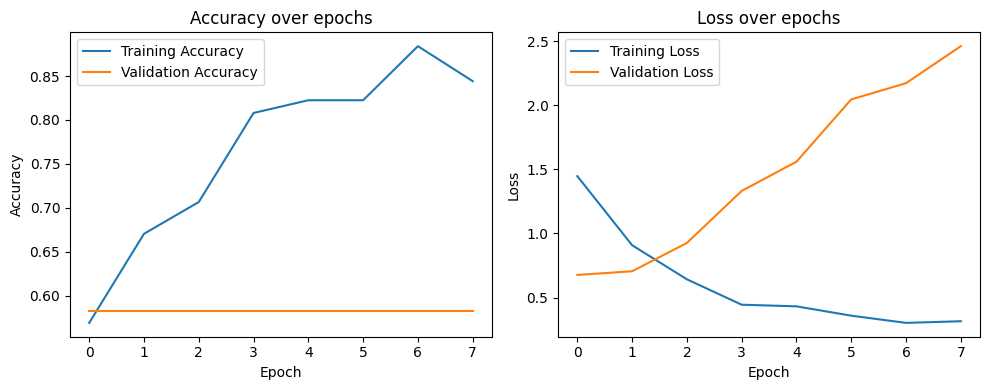

In [ ]:
import matplotlib.pyplot as plt

# Accuracy
plt.figure(figsize=(10, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy over epochs')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

# Loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss over epochs')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()


In [ ]:
from tensorflow.keras.callbacks import TensorBoard
import datetime

log_dir = "logs/fit/" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
tensorboard_callback = TensorBoard(log_dir=log_dir, histogram_freq=1)


In [ ]:
history = model.fit(
    train_gen,                # générateur d’images d’entraînement
    validation_data=val_gen,  # générateur d’images de validation
    epochs=30,                # nombre maximal d’époques (tu peux augmenter si besoin)
    callbacks=[early_stop],   # callback pour early stopping
    verbose=1                 # afficher la progression dans la console
)


Epoch 1/30
9/9 ━━━━━━━━━━━━━━━━━━━━ 4s 397ms/step - accuracy: 0.5957 - loss: 1.1343 - val_accuracy: 0.5821 - val_loss: 0.6732
Epoch 2/30
9/9 ━━━━━━━━━━━━━━━━━━━━ 3s 382ms/step - accuracy: 0.7427 - loss: 0.5743 - val_accuracy: 0.5821 - val_loss: 0.7286
Epoch 3/30
9/9 ━━━━━━━━━━━━━━━━━━━━ 4s 392ms/step - accuracy: 0.7962 - loss: 0.4828 - val_accuracy: 0.5821 - val_loss: 0.9915
Epoch 4/30
9/9 ━━━━━━━━━━━━━━━━━━━━ 3s 401ms/step - accuracy: 0.8381 - loss: 0.4003 - val_accuracy: 0.5821 - val_loss: 1.1446
Epoch 5/30
9/9 ━━━━━━━━━━━━━━━━━━━━ 4s 382ms/step - accuracy: 0.8345 - loss: 0.4189 - val_accuracy: 0.5821 - val_loss: 1.6771
Epoch 6/30
9/9 ━━━━━━━━━━━━━━━━━━━━ 4s 392ms/step - accuracy: 0.9008 - loss: 0.3283 - val_accuracy: 0.5821 - val_loss: 1.8933
Epoch 7/30
9/9 ━━━━━━━━━━━━━━━━━━━━ 4s 406ms/step - accuracy: 0.8907 - loss: 0.3383 - val_accuracy: 0.5821 - val_loss: 2.4043
Epoch 8/30
9/9 ━━━━━━━━━━━━━━━━━━━━ 4s 396ms/step - accuracy: 0.9194 - loss: 0.2336 - val_accuracy: 0.5821 - val_loss:

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step


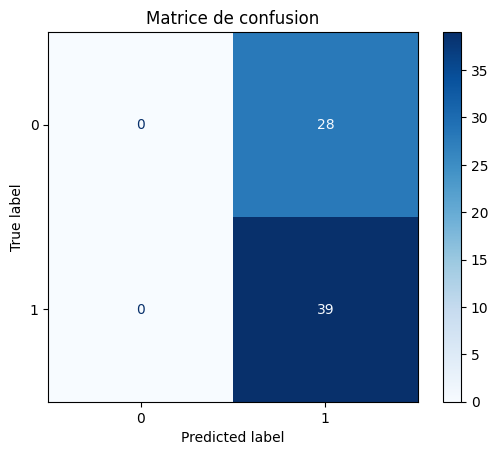

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import numpy as np
# Supposons que tu utilises val_generator pour validation
y_pred_probs = model.predict(val_gen)
y_pred = (y_pred_probs > 0.5).astype("int32")

# Attention : val_generator.classes donne les vraies étiquettes
y_true = val_gen.classes
cm = confusion_matrix(y_true, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap=plt.cm.Blues)
plt.title('Matrice de confusion')
plt.show()




3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
Rapport de classification :

              precision    recall  f1-score   support

  Non blessé       0.00      0.00      0.00        28
      Blessé       0.58      1.00      0.74        39

    accuracy                           0.58        67
   macro avg       0.29      0.50      0.37        67
weighted avg       0.34      0.58      0.43        67



c:\Users\jireh\miniconda3\envs\Data-ML\lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\jireh\miniconda3\envs\Data-ML\lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\jireh\miniconda3\envs\Data-ML\lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result)

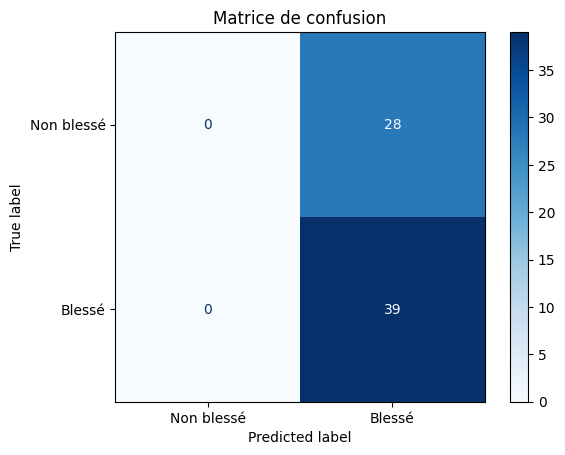

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
import numpy as np

# Prédictions sur le générateur de validation
y_pred_probs = model.predict(val_gen)
y_pred = (y_pred_probs > 0.5).astype("int32").reshape(-1)
y_true = val_gen.classes

# Afficher les métriques
target_names = ["Non blessé", "Blessé"]
print("Rapport de classification :\n")
print(classification_report(y_true, y_pred, target_names=target_names))
# Créer la matrice de confusion
cm = confusion_matrix(y_true, y_pred)

# Afficher et sauvegarder
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=target_names)
disp.plot(cmap=plt.cm.Blues)
plt.title("Matrice de confusion")
plt.grid(False)

# Sauvegarde
plt.savefig("matrice_confusion.png")
plt.show()


In [ ]:
print(train_gen.class_indices)
count_blesse = len(train_gen.filepaths) - sum(train_gen.classes)
count_non_blesse = sum(train_gen.classes)
print(f"Blessés : {count_blesse}, Non blessés : {count_non_blesse}")


{'injured_animals-20250525T192148Z-1-001': 0, 'not_injured_animals-20250525T192152Z-1-001': 1}
Blessés : 116, Non blessés : 160


Found 276 images belonging to 2 classes.
Found 67 images belonging to 2 classes.
Class weights: {0: np.float64(1.1896551724137931), 1: np.float64(0.8625)}
Epoch 1/10


c:\Users\jireh\miniconda3\envs\Data-ML\lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
c:\Users\jireh\miniconda3\envs\Data-ML\lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


9/9 ━━━━━━━━━━━━━━━━━━━━ 4s 357ms/step - accuracy: 0.5872 - loss: 3.9766 - val_accuracy: 0.4179 - val_loss: 0.8985
Epoch 2/10
9/9 ━━━━━━━━━━━━━━━━━━━━ 3s 279ms/step - accuracy: 0.5483 - loss: 0.6945 - val_accuracy: 0.5672 - val_loss: 0.6938
Epoch 3/10
9/9 ━━━━━━━━━━━━━━━━━━━━ 3s 288ms/step - accuracy: 0.7215 - loss: 0.4945 - val_accuracy: 0.6716 - val_loss: 0.7162
Epoch 4/10
9/9 ━━━━━━━━━━━━━━━━━━━━ 3s 280ms/step - accuracy: 0.8694 - loss: 0.2955 - val_accuracy: 0.6567 - val_loss: 0.7412
Epoch 5/10
9/9 ━━━━━━━━━━━━━━━━━━━━ 3s 280ms/step - accuracy: 0.9850 - loss: 0.1292 - val_accuracy: 0.4925 - val_loss: 1.6531
Epoch 6/10
9/9 ━━━━━━━━━━━━━━━━━━━━ 3s 283ms/step - accuracy: 0.8867 - loss: 0.2331 - val_accuracy: 0.6269 - val_loss: 0.7204
Epoch 7/10
9/9 ━━━━━━━━━━━━━━━━━━━━ 3s 288ms/step - accuracy: 0.9891 - loss: 0.0966 - val_accuracy: 0.6119 - val_loss: 0.8952
Epoch 8/10
9/9 ━━━━━━━━━━━━━━━━━━━━ 3s 297ms/step - accuracy: 0.9931 - loss: 0.0548 - val_accuracy: 0.5821 - val_loss: 1.0784
Epo

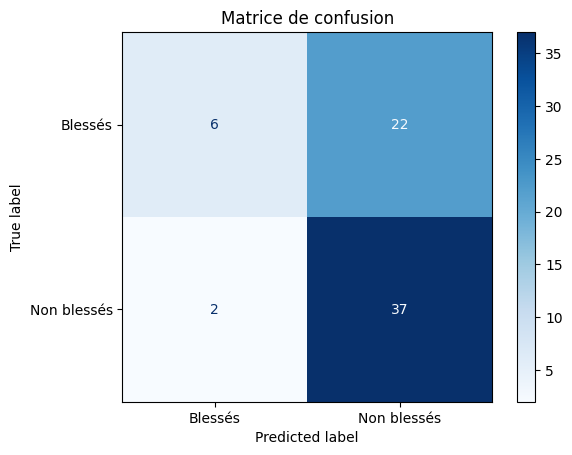

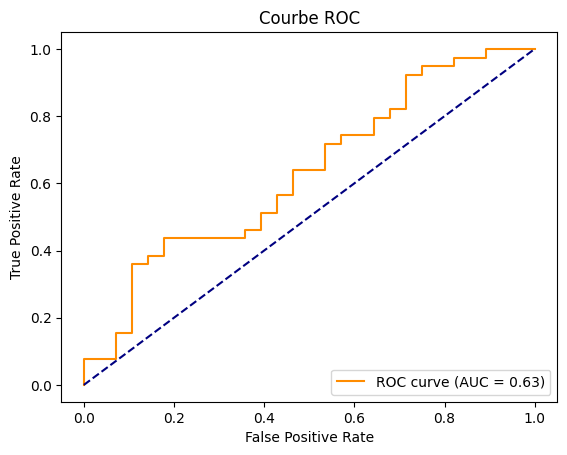

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 124ms/step


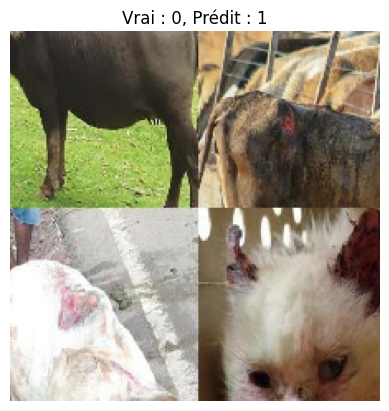

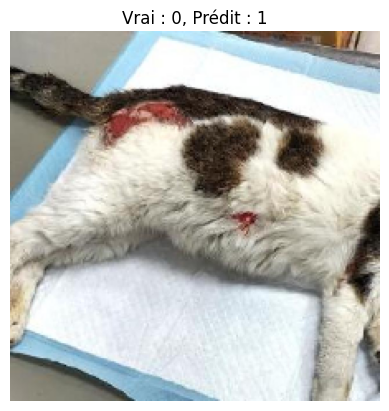

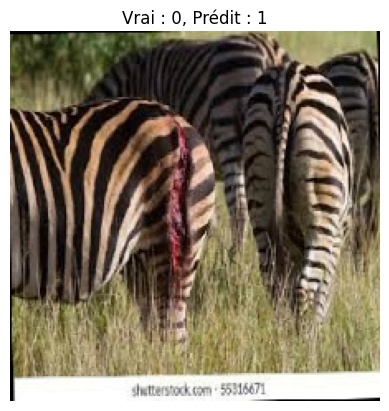

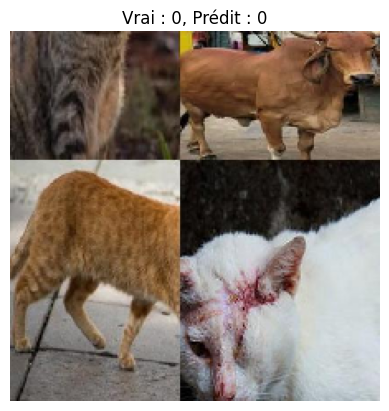

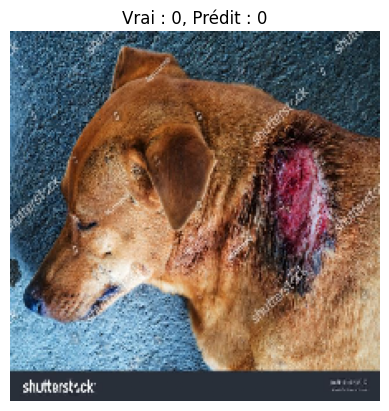

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from sklearn.utils import class_weight
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, roc_curve, auc

# === 1. Préparation des datasets ===

img_size = (224, 224)
batch_size = 32

datagen = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2
)

train_gen = datagen.flow_from_directory(
    "C:/Users/jireh/Documents/Machine_learning_project/dataset",  # ← change ici
    target_size=img_size,
    batch_size=batch_size,
    class_mode='binary',
    subset='training',
    shuffle=True,
    seed=42
)

val_gen = datagen.flow_from_directory(
    "C:/Users/jireh/Documents/Machine_learning_project/dataset",  # ← change ici
    target_size=img_size,
    batch_size=batch_size,
    class_mode='binary',
    subset='validation',
    shuffle=False,  # important pour évaluation
    seed=42
)

# === 2. Calcul des class weights ===

class_weights = class_weight.compute_class_weight(
    class_weight='balanced',
    classes=np.unique(train_gen.classes),
    y=train_gen.classes
)
class_weights = dict(enumerate(class_weights))
print("Class weights:", class_weights)

# === 3. Modèle simple CNN (à adapter si besoin) ===

model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(*img_size, 3)),
    MaxPooling2D(2, 2),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    Flatten(),
    Dense(128, activation='relu'),
    Dense(1, activation='sigmoid')
])

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# === 4. Entraînement ===

model.fit(
    train_gen,
    validation_data=val_gen,
    epochs=10,
    class_weight=class_weights
)

# === 5. Évaluation — Matrice de confusion ===

val_gen.reset()
y_true = val_gen.classes
y_pred_prob = model.predict(val_gen, verbose=0)
y_pred = (y_pred_prob > 0.5).astype(int).reshape(-1)

cm = confusion_matrix(y_true, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Blessés', 'Non blessés'])
disp.plot(cmap='Blues')
plt.title("Matrice de confusion")
plt.show()

# === 6. Courbe ROC ===

fpr, tpr, _ = roc_curve(y_true, y_pred_prob)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Courbe ROC')
plt.legend(loc='lower right')
plt.show()

# === 7. Affichage de quelques prédictions ===

val_gen.reset()
images, labels = next(val_gen)
preds = model.predict(images)
pred_classes = (preds > 0.5).astype(int).reshape(-1)

for i in range(5):
    plt.imshow(images[i])
    plt.title(f"Vrai : {int(labels[i])}, Prédit : {pred_classes[i]}")
    plt.axis('off')
    plt.show()
